# GOOGLE stock price prediction LSTM

Table of Content

#### 1. Load and Analyze Data 
#### 2. Extract GOOGLE stock data and analyze it
#### 3. Prepare Train and Test dataset
#### 4. Prediction Model
#### 4.1 Linear regression model
#### 4.2 LSTM

# 1. Load and Analyze Data 

In [1]:
import numpy as np
import pandas as pd
import os
import warnings; warnings.simplefilter('ignore')
import plotly.graph_objs as go
import plotly.offline as py
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [2]:
df=pd.read_csv('../input/nyse/prices.csv')
df

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0
...,...,...,...,...,...,...,...
851259,2016-12-30,ZBH,103.309998,103.199997,102.849998,103.930000,973800.0
851260,2016-12-30,ZION,43.070000,43.040001,42.689999,43.310001,1938100.0
851261,2016-12-30,ZTS,53.639999,53.529999,53.270000,53.740002,1701200.0
851262,2016-12-30 00:00:00,AIV,44.730000,45.450001,44.410000,45.590000,1380900.0


In [3]:
print("Starting date : {}".format(df['date'].min()))
print("Ending   date : {}".format(df['date'].max()))

Starting date : 2010-01-04
Ending   date : 2016-12-30 00:00:00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    851264 non-null  object 
 1   symbol  851264 non-null  object 
 2   open    851264 non-null  float64
 3   close   851264 non-null  float64
 4   low     851264 non-null  float64
 5   high    851264 non-null  float64
 6   volume  851264 non-null  float64
dtypes: float64(5), object(2)
memory usage: 45.5+ MB


In [5]:
df.describe()

,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,70.836986,70.857109,70.118414,71.543476,5.415113e+06
std,83.695876,83.689686,82.877294,84.465504,1.249468e+07
min,0.850000,0.860000,0.830000,0.880000,0.000000e+00
25%,33.840000,33.849998,33.480000,34.189999,1.221500e+06
50%,52.770000,52.799999,52.230000,53.310001,2.476250e+06
75%,79.879997,79.889999,79.110001,80.610001,5.222500e+06
max,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


In [6]:
print("Lowest Stock Price : \n")
df[['date','symbol','low']][df['low']==df['low'].min()]

Lowest Stock Price : 



,date,symbol,low
90955,2010-10-08,LVLT,0.83


In [7]:
print("Highest Stock Price : \n")

df[['date','symbol','high']][df['high']==df['high'].max()]

Highest Stock Price : 



,date,symbol,high
834115,2016-11-10,PCLN,1600.930054


In [8]:
print("Minimum Stock Volume : \n")
df[df['volume']==df['volume'].min()]

Minimum Stock Volume : 



,date,symbol,open,close,low,high,volume
1270,2010-01-06,CHTR,35.000000,35.000000,35.000000,35.000000,0.0
13906,2010-02-16,CHTR,29.740000,29.740000,29.740000,29.740000,0.0
14374,2010-02-17,CHTR,29.740000,29.740000,29.740000,29.740000,0.0
15310,2010-02-19,CHTR,29.700001,29.700001,29.700001,29.700001,0.0
16246,2010-02-23,CHTR,29.700001,29.700001,29.700001,29.700001,0.0
16714,2010-02-24,CHTR,29.700001,29.700001,29.700001,29.700001,0.0
30754,2010-04-08,CHTR,34.549999,34.549999,34.549999,34.549999,0.0
32158,2010-04-13,CHTR,35.000000,35.000000,35.000000,35.000000,0.0
34498,2010-04-20,CHTR,36.009998,36.009998,36.009998,36.009998,0.0
42465,2010-05-13,CHTR,38.000000,38.000000,38.000000,38.000000,0.0


In [9]:
print("Maximum Stock Volume : \n")
df[df['volume']==df['volume'].max()]

Maximum Stock Volume : 



,date,symbol,open,close,low,high,volume
195050,2011-08-25,BAC,8.29,7.65,7.38,8.8,859643400.0


In [10]:
print("Number of Companies : ",df['symbol'].nunique())
df['symbol'].unique()

Number of Companies :  501


array(['WLTW', 'A', 'AAL', 'AAP', 'AAPL', 'ABC', 'ABT', 'ACN', 'ADBE',
       'ADI', 'ADM', 'ADP', 'ADS', 'ADSK', 'AEE', 'AEP', 'AES', 'AET',
       'AFL', 'AGN', 'AIG', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALK', 'ALL',
       'ALXN', 'AMAT', 'AME', 'AMG', 'AMGN', 'AMP', 'AMT', 'AMZN', 'AN',
       'ANTM', 'AON', 'APA', 'APC', 'APD', 'APH', 'ARNC', 'ATVI', 'AVB',
       'AVGO', 'AVY', 'AWK', 'AXP', 'AYI', 'AZO', 'BA', 'BAC', 'BAX',
       'BBBY', 'BBT', 'BBY', 'BCR', 'BDX', 'BEN', 'BHI', 'BIIB', 'BK',
       'BLK', 'BLL', 'BMY', 'BSX', 'BWA', 'BXP', 'C', 'CA', 'CAG', 'CAH',
       'CAT', 'CB', 'CBG', 'CBS', 'CCI', 'CCL', 'CELG', 'CERN', 'CF',
       'CHD', 'CHK', 'CHRW', 'CI', 'CINF', 'CL', 'CLX', 'CMA', 'CMCSA',
       'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COG', 'COH',
       'COL', 'COO', 'COP', 'COST', 'CPB', 'CRM', 'CSCO', 'CSX', 'CTAS',
       'CTL', 'CTSH', 'CTXS', 'CVS', 'CVX', 'CXO', 'D', 'DAL', 'DD', 'DE',
       'DFS', 'DG', 'DGX', 'DHI', 'DHR', 'DIS', 'DISCA', 'DISCK', 

# 2. Extract GOOGLE stock data and analyze it

In [11]:
df1=df[df['symbol']=='GOOGL']
df1

,date,symbol,open,close,low,high,volume
440,2010-01-04,GOOGL,626.950006,626.750011,624.240011,629.510005,3908400.0
908,2010-01-05,GOOGL,627.180001,623.990017,621.540016,627.839984,6003300.0
1376,2010-01-06,GOOGL,625.860033,608.260035,606.360021,625.860033,7949400.0
1844,2010-01-07,GOOGL,609.400008,594.100015,592.649990,609.999993,12815700.0
2312,2010-01-08,GOOGL,592.000005,602.020005,589.110015,603.250036,9439100.0
...,...,...,...,...,...,...,...
848964,2016-12-23,GOOGL,808.010010,807.799988,805.109985,810.969971,764100.0
849464,2016-12-27,GOOGL,808.679993,809.929993,805.799988,816.000000,974400.0
849964,2016-12-28,GOOGL,813.330017,804.570007,802.440002,813.330017,1199700.0
850464,2016-12-29,GOOGL,802.330017,802.880005,798.140015,805.750000,1056500.0


In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1762 entries, 440 to 850964
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1762 non-null   object 
 1   symbol  1762 non-null   object 
 2   open    1762 non-null   float64
 3   close   1762 non-null   float64
 4   low     1762 non-null   float64
 5   high    1762 non-null   float64
 6   volume  1762 non-null   float64
dtypes: float64(5), object(2)
memory usage: 110.1+ KB


In [13]:
df1.describe()

,open,close,low,high,volume
count,1762.000000,1762.000000,1762.000000,1762.000000,1.762000e+03
mean,675.864352,675.583348,669.769148,681.287468,4.096043e+06
std,161.953370,161.869288,161.099882,162.608176,2.884423e+06
min,438.310006,436.069999,433.629998,442.280000,5.206000e+05
25%,557.057500,555.770031,551.015007,560.937500,2.004075e+06
50%,617.060003,616.500017,611.999990,620.820034,3.670550e+06
75%,764.227509,762.774979,757.354996,769.319992,5.171750e+06
max,1226.800064,1220.169982,1218.600020,1228.880013,2.961990e+07


In [14]:
print("Lowest Stock Price : \n")

df1[['date','symbol','low']][df1['low']==df1['low'].min()]

Lowest Stock Price : 



,date,symbol,low
58517,2010-07-01,GOOGL,433.629998
59455,2010-07-06,GOOGL,433.629998


In [15]:
print("Highest Stock Price : \n")

df1[['date','symbol','high']][df1['high']==df1['high'].max()]

Highest Stock Price : 



,date,symbol,high
495281,2014-02-26,GOOGL,1228.880013


In [16]:
print("Minimum Stock Volume : \n")
df1[df1['volume']==df1['volume'].min()]

Minimum Stock Volume : 



,date,symbol,open,close,low,high,volume
723095,2015-12-24,GOOGL,768.52002,765.840027,764.390015,769.200012,520600.0


In [17]:
print("Maximum Stock Volume : \n")
df1[df1['volume']==df1['volume'].max()]

Maximum Stock Volume : 



,date,symbol,open,close,low,high,volume
93223,2010-10-15,GOOGL,599.270011,601.450019,591.600015,601.640014,29619900.0


In [18]:
np.round(df1.median(),2)

open          617.06
close         616.50
low           612.00
high          620.82
volume    3670550.00
dtype: float64

In [19]:
df1['date']=pd.to_datetime(df1['date'])

In [20]:
print("Starting date : {}".format(df1['date'].min()))
print("Ending   date : {}".format(df1['date'].max()))

Starting date : 2010-01-04 00:00:00
Ending   date : 2016-12-30 00:00:00


In [21]:
data = []
data.append(go.Scatter(x = df1['date'], y = df1['open'].values,name = "Open"))
data.append(go.Scatter(x = df1['date'], y = df1['close'].values,name = "Close" ))
layout = go.Layout(dict(title = "Opening and Closing prices of GOOGLE asset",
                  xaxis = dict(title = 'Year'),
                  yaxis = dict(title = 'Price (USD)'),
                  ),legend=dict(
                orientation="h"))
py.iplot(dict(data=data, layout=layout), filename='basic-line')

In [22]:
data = []
for asset in ['AMZN','AAPL','GOOGL']:
    asset_df = df[(df['symbol'] == asset)]

    data.append(go.Scatter(x = asset_df['date'].values, y = asset_df['close'].values,name = asset ))
layout = go.Layout(dict(title = "Closing prices of 3 assets - AMAZON, APPLE, GOOGLE",
                  xaxis = dict(title = 'Year'),
                  yaxis = dict(title = 'Price (USD)'),
                  ),legend=dict(
                orientation="h"))
py.iplot(dict(data=data, layout=layout), filename='basic-line')

In [23]:
data = []
data.append(go.Scatter(x = df1['date'], y = df1['volume'].values,name = "Volume"))
layout = go.Layout(dict(title = "Volume of GOOGLE asset",
                  xaxis = dict(title = 'Year'),
                  yaxis = dict(title = 'Volume'),
                  ),legend=dict(
                orientation="h"))
py.iplot(dict(data=data, layout=layout), filename='basic-line')

In [24]:
data = []
for asset in ['AMZN','AAPL','GOOGL']:
    asset_df = df[(df['symbol'] == asset)]

    data.append(go.Scatter(x = asset_df['date'].values, y = asset_df['volume'].values,name = asset ))
layout = go.Layout(dict(title = "Volume of 3 assets - AMAZON, APPLE, GOOGLE",
                  xaxis = dict(title = 'Year'),
                  yaxis = dict(title = 'Volume'),
                  ),legend=dict(
                orientation="h"))
py.iplot(dict(data=data, layout=layout), filename='basic-line')

In [25]:
df['price_diff'] = df['close'] - df['open']
grouped = df.groupby('date').agg({'price_diff': ['std', 'min']}).reset_index()

In [26]:
print(f"Average standard deviation of price change within a day in {grouped['price_diff']['std'].mean():.4f}.")

Average standard deviation of price change within a day in 1.1954.


In [27]:
df1.drop(['symbol'], axis=1, inplace=True)

In [28]:
colors = ['#C71585','#0000CD']
sns.set(palette=colors, font='Serif', style='white', rc={'axes.facecolor':'whitesmoke', 'figure.facecolor':'whitesmoke'})

df1.corr()['close']

open      0.998870
close     1.000000
low       0.999557
high      0.999447
volume   -0.142057
Name: close, dtype: float64

<AxesSubplot:>

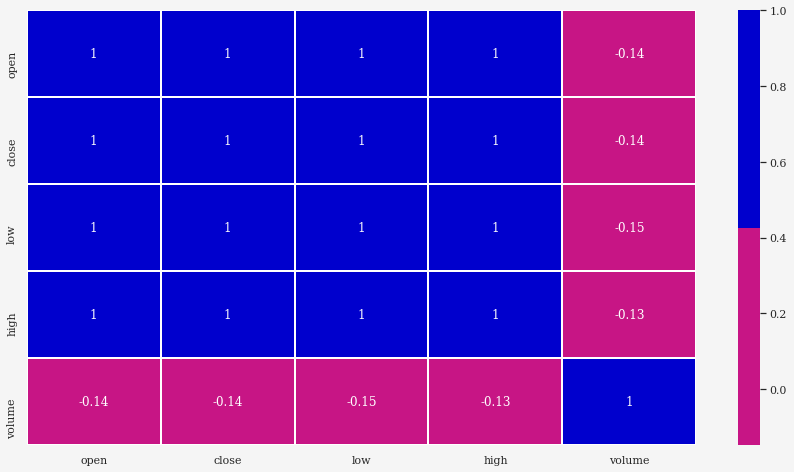

In [29]:
fig=plt.figure(figsize=(15,8))
sns.heatmap(df1.corr(), annot=True, cmap=[colors[0],colors[1]], linecolor='white', linewidth=2 )

# 3. Prepare Train and Test dataset

In [30]:
X=df1[['date','volume','open']]
y=df1['close']

In [31]:
XX_train = X[:1000]
XX_test = X[1000:]

y_train = y[:1000]
y_test = y[1000:]

In [32]:
print("Starting date : {}".format(XX_test['date'].min()))
print("Ending   date : {}".format(XX_test['date'].max()))

Starting date : 2013-12-23 00:00:00
Ending   date : 2016-12-30 00:00:00


In [33]:
X_train = XX_train[['volume','open']]
X_test = XX_test[['volume','open']]

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test =scaler.transform(X_test)

# 4. Prediction Model

# 4.1 Linear regression model

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn import set_config
model = LinearRegression()
model.fit(X_train,y_train)
set_config(display='diagram')
pred=model.predict(X_test)
sc=np.round(model.score(X_test, y_test),2) * 100
r2=np.round(r2_score(y_test,pred),2)
mse=np.round(mean_squared_error(y_test,pred),2)
mae=np.round(mean_squared_error(y_test,pred),2)

In [36]:
pred_df = pd.DataFrame(pred,y_test.index,['prediction'])
y_test = pd.DataFrame(y_test,y_test.index,['close'])

XX_test = XX_test.join(pred_df)
XX_test = XX_test.join(y_test)

In [37]:
XX_test

,date,volume,open,prediction,close
474211,2013-12-23,3439700.0,1107.840040,1108.483763,1115.099985
474701,2013-12-24,1466900.0,1114.969988,1116.264188,1111.840064
475191,2013-12-26,2672900.0,1114.010011,1114.906812,1117.460049
475681,2013-12-27,3136200.0,1119.999987,1120.744583,1118.400026
476171,2013-12-30,2469700.0,1120.339979,1121.304185,1109.460000
...,...,...,...,...,...
848964,2016-12-23,764100.0,808.010010,809.513489,807.799988
849464,2016-12-27,974400.0,808.679993,810.114235,809.929993
849964,2016-12-28,1199700.0,813.330017,814.690369,804.570007
850464,2016-12-29,1056500.0,802.330017,803.736750,802.880005


In [38]:
data = []
data.append(go.Scatter(x = XX_test['date'], y = XX_test['prediction'].values,name = "Prediction"))
data.append(go.Scatter(x = XX_test['date'], y = XX_test['close'].values,name = "Actual" ))
layout = go.Layout(dict(title = "Predicted and Actual Closing prices of GOOGLE asset",
                  xaxis = dict(title = 'Year'),
                  yaxis = dict(title = 'Price (USD)'),
                  ),legend=dict(
                orientation="h"))
py.iplot(dict(data=data, layout=layout), filename='basic-line')

# 4.2 LSTM

In [39]:
X=df1[['open']]
y=df1['close']
dates = df1['date']
length=100


In [40]:
training_set = X.iloc[:1000].values
test_set = X.iloc[1000:].values
test_dates = dates[1000:]

In [41]:
maxOpen = max(training_set)
minOpen = min(training_set)

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
test_set_scaled=sc.transform(test_set)

### Creating a model with 100 time-steps and 1 output
### Prediction of CLOSE price would depend on Previous 100 days

In [42]:
X_train = []
y_train = []

for i in range(length, len(training_set)):
    X_train.append(training_set_scaled[i-length:i, 0])
    y_train.append(training_set_scaled[i, 0])
    
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [43]:
X_test = []
y_test = []
for i in range(length, len(test_set)):
    X_test.append(test_set_scaled[i-length:i, 0])
    y_test.append(test_set_scaled[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
model = Sequential()
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
model.add(Dense(units = 1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')

model.fit(X_train, y_train, validation_data=(X_test,y_test),epochs = 100, batch_size = 32)

Epoch 1/100
29/29 [==============================] - 16s 345ms/step - loss: 0.0539 - val_loss: 0.0023
Epoch 2/100
29/29 [==============================] - 8s 267ms/step - loss: 0.0060 - val_loss: 0.0021
Epoch 3/100
29/29 [==============================] - 8s 266ms/step - loss: 0.0048 - val_loss: 0.0021
Epoch 4/100
29/29 [==============================] - 8s 266ms/step - loss: 0.0046 - val_loss: 0.0024
Epoch 5/100
29/29 [==============================] - 8s 281ms/step - loss: 0.0046 - val_loss: 0.0018
Epoch 6/100
29/29 [==============================] - 8s 270ms/step - loss: 0.0038 - val_loss: 0.0018
Epoch 7/100
29/29 [==============================] - 8s 273ms/step - loss: 0.0044 - val_loss: 0.0025
Epoch 8/100
29/29 [==============================] - 8s 271ms/step - loss: 0.0047 - val_loss: 0.0043
Epoch 9/100
29/29 [==============================] - 8s 277ms/step - loss: 0.0054 - val_loss: 0.0018
Epoch 10/100
29/29 [==============================] - 8s 268ms/step - loss: 0.0040 - val_l

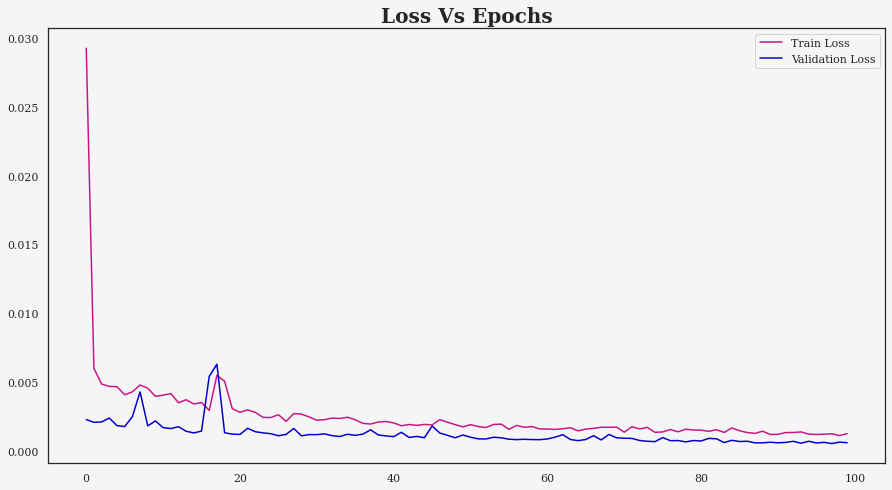

In [45]:
loss = pd.DataFrame()

fig=plt.figure(figsize=(15,8))
plt.title("Loss Vs Epochs", size=20, weight='bold')

plt.plot(model.history.history['loss'],label='Train Loss')
plt.plot(model.history.history['val_loss'],label='Validation Loss')
plt.legend(loc='best')

plt.show()


In [46]:
pred=model.predict(X_test)

In [47]:
y_test = y_test.reshape(-1, 1)

sc = MinMaxScaler(feature_range = (minOpen, maxOpen))
pred_scaled = sc.fit_transform(pred)
y_test_scaled=sc.transform(y_test)

In [48]:
test=pd.DataFrame(columns=['test','pred'])
test['test']=y_test_scaled.flatten()
test['pred']=pred_scaled.flatten()
test

,test,pred
0,468.866807,527.853760
1,491.598916,523.207886
2,497.527306,519.444336
3,516.538856,519.813721
4,528.661276,526.147705
...,...,...
657,1039.479816,1047.534424
658,1040.849432,1044.118042
659,1050.355268,1041.509155
660,1027.868459,1042.188232


In [49]:
r2 = r2_score(y_test_scaled,pred_scaled)
mse = mean_squared_error(y_test_scaled,pred_scaled)
mae = mean_squared_error(y_test_scaled,pred_scaled)

print('R2 Score : ',r2)
print('Mean Squared error : ',mse)
print('Mean Absolute error :',mae)

R2 Score :  0.975861709136619
Mean Squared error :  1038.2679851974347
Mean Absolute error : 1038.2679851974347


In [50]:
data = []
data.append(go.Scatter(x = test_dates, y = test['pred'].values,name = "Prediction"))
data.append(go.Scatter(x = test_dates, y = test['test'].values,name = "Actual" ))
layout = go.Layout(dict(title = "Predicted and Actual Closing prices of GOOGLE asset",
                  xaxis = dict(title = 'Year'),
                  yaxis = dict(title = 'Price'),
                  ),legend=dict(
                orientation="h"))
py.iplot(dict(data=data, layout=layout), filename='basic-line')